In [1]:
from occurrences import Occurrences, Raster
import pandas as pd
import geopandas as gpd
import rioxarray
from shapely import Point, box
import numpy as np
import xarray
import matplotlib.pyplot as plt

raster = rioxarray.open_rasterio('../data/wc2.1_30s_bio_1.tif')

# # print(raster[1, 2])

data = pd.read_csv('../data/occurrence.txt', sep="\t", low_memory=False)
geometry = [Point(xy) for xy in zip(data.decimalLongitude, data.decimalLatitude)]
# geometry = [x.buffer(0.2) for x in geometry]
data = gpd.GeoDataFrame(data, crs="EPSG:4326", geometry=geometry)


/Users/macgregor/sdm-cnn/src/occurrences.py:193: FutureWarning: xarray subclass Raster should explicitly define __slots__
  class Raster(xarray.DataArray):


/opt/homebrew/anaconda3/envs/torchenv/lib/python3.9/site-packages/geopandas/geodataframe.py:202: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)


There are 20 records within [-166, 43, -156, 53]. Removed 0, yielding 20.
There are 145 records within [-166, 53, -156, 63]. Removed 95, yielding 50.
There are 28 records within [-156, 43, -146, 53]. Removed 0, yielding 28.
There are 1092 records within [-156, 53, -146, 63]. Removed 273, yielding 819.
There are 891 records within [-146, 43, -136, 53]. Removed 223, yielding 668.
There are 2317 records within [-146, 53, -136, 63]. Removed 579, yielding 1738.
There are 52 records within [-136, 23, -126, 33]. Removed 2, yielding 50.
There are 1592 records within [-136, 33, -126, 43]. Removed 398, yielding 1194.
There are 4317 records within [-136, 43, -126, 53]. Removed 1079, yielding 3238.
There are 3450 records within [-136, 53, -126, 63]. Removed 862, yielding 2588.
There are 1964 records within [-126, 23, -116, 33]. Removed 491, yielding 1473.
There are 4633 records within [-126, 33, -116, 43]. Removed 1158, yielding 3475.
There are 6620 records within [-126, 43, -116, 53]. Removed 165

<AxesSubplot: >

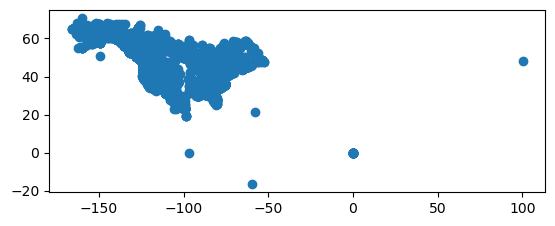

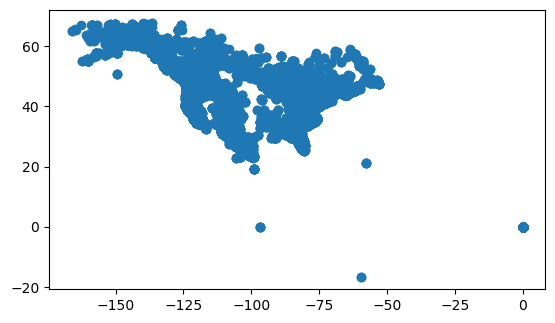

In [2]:
# print(data.loc[0:1, :])

occs = Occurrences(data.loc[:5000, :])
thinned = occs.thin(resolution = 10, thin_proportion=0.25, minimum=50)

occs.plot()
thinned.plot()